In [1]:
# トイデータを使った LDA の推論テスト（実装原本版）

In [2]:
!curl -Os http://chasen.org/~daiti-m/dist/lda-python/lda.py-0.3.tar.gz
!tar xzf lda.py-0.3.tar.gz

%cd lda.py-0.3

!python setup.py build_ext -i

%cd ..

/usr/src/develop/notebooks/lda.py-0.3


/usr/src/develop/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/usr/src/develop/notebooks


In [3]:
import sys
import numpy as np
np.set_printoptions(threshold=100, linewidth=200)
#np.set_printoptions(threshold=sys.maxsize, linewidth=200)

from pprint import pprint
from tqdm import tqdm

from test_utils import generate_lda_toy_data, assign_phi, assign_theta, plot_phi, plot_theta

In [4]:
D = 1000 # 文書数
V = 100  # 語彙数
K = 5    # トピック数
alpha = 1.0  # トピック分布の共役事前分布のハイパーパラメータ
beta  = 1.0  # 語彙分布の共役事前分布のハイパーパラメータ

generate_lda_toy_data(D, V, K, alpha=alpha, beta=beta, seed=123)

generating...


100%|████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 559.27it/s]


{'K': 5,
 'alpha': 1.0,
 'beta': 1.0,
 'phi': array([[0.00841513, 0.00275464, 0.01963053, ..., 0.0071981 , 0.02979759, 0.0044797 ],
        [0.00442285, 0.01253262, 0.00665678, ..., 0.01118651, 0.00460077, 0.00208758],
        [0.01943387, 0.00214249, 0.00821572, ..., 0.01369453, 0.00905449, 0.01190491],
        [0.00883959, 0.01180355, 0.00389859, ..., 0.01052288, 0.01468546, 0.00967758],
        [0.02435371, 0.04021486, 0.00043271, ..., 0.00216879, 0.01245777, 0.01000887]]),
 'theta': array([[0.30894856, 0.08734291, 0.06666896, 0.2076722 , 0.32936737],
        [0.08078721, 0.5802404 , 0.16957052, 0.09629893, 0.07310294],
        [0.14633129, 0.45458744, 0.20096238, 0.02142105, 0.17669784],
        ...,
        [0.29445793, 0.3934804 , 0.12332177, 0.00267695, 0.18606295],
        [0.10434347, 0.5546568 , 0.04513363, 0.01267345, 0.28319265],
        [0.15113003, 0.09596685, 0.12259945, 0.62054078, 0.00976289]])}

In [5]:
!head -n5 ./lda.test.bow.txt

0:5 1:2 2:1 4:2 6:1 7:2 8:2 9:4 10:2 12:1 13:1 14:1 15:2 17:2 20:1 21:5 24:2 25:4 26:1 27:5 28:3 29:1 31:1 32:2 35:2 36:1 37:3 38:1 39:1 40:2 41:5 42:2 43:4 45:1 46:2 48:4 49:4 51:2 52:1 53:2 54:1 57:1 59:3 60:2 61:5 62:3 64:3 65:4 68:2 70:2 71:1 74:1 75:1 76:2 79:1 80:4 84:1 85:1 86:5 87:2 88:1 90:3 91:2 93:2 94:1 95:1 97:1 98:1
1:3 4:1 6:2 7:4 8:2 9:1 11:1 12:3 13:1 15:1 16:1 18:4 19:1 20:2 23:3 24:2 25:3 26:1 27:2 29:2 30:1 31:1 37:2 38:2 39:4 40:1 41:2 43:3 44:2 45:1 47:1 50:5 51:2 53:1 55:1 57:2 58:2 59:5 60:2 63:1 64:2 65:1 67:1 69:2 71:1 72:3 73:1 74:1 76:2 77:1 80:2 81:1 82:4 83:5 84:2 85:3 86:1 87:1 88:1 89:1 90:1 93:1 94:1 97:3 98:2
0:1 1:1 2:1 3:1 4:1 6:2 7:6 8:9 9:1 11:3 12:5 13:1 14:3 15:2 16:2 17:1 18:4 19:1 20:2 21:1 23:2 24:1 25:2 26:2 27:3 28:1 32:1 33:4 34:1 35:2 36:1 37:1 38:2 39:3 40:6 41:3 43:1 46:2 48:1 49:2 50:1 51:3 54:4 55:2 56:2 57:7 58:1 59:5 60:4 62:4 64:2 65:3 67:1 68:4 69:2 70:3 71:1 72:3 73:2 75:2 76:2 78:1 80:1 82:8 83:1 84:1 85:5 86:4 87:3 88:4 89:1 90:

In [6]:
params = np.load("./lda.test.params.npz")
_, true_alpha, true_beta, true_phi, true_theta = int(params["K"]), float(params["alpha"]), float(params["beta"]), params["phi"], params["theta"]

In [7]:
!python lda.py lda.test.bow.txt model -K 5 -N 1000 -a 1 -b 1

LDA: K = 5, iters = 1000, alpha = 1, beta = 1
documents = 1000, lexicon = 100, nwords = 149790
initializing..
Gibbs iteration [1000/1000] PPL = 69.76 (joint=263.07) alpha=1.000 beta=1.000
saving model to model .. 
done.


In [8]:
import gzip
import pickle

with gzip.open ("model", "rb") as gf:
    model = pickle.load (gf)

estimated_phi = model["beta"].T
estimated_theta = model["theta"]

In [9]:
# 推定分布を KL ダイバージェンスをヒントに真の分布に割り当て（マッピング）
assign, phi = assign_phi(true_phi, estimated_phi)


Topic Matching (True -> Estimated):
True Topic 0 matched with Estimated Topic 1 | KL Divergence: 0.0273
True Topic 1 matched with Estimated Topic 0 | KL Divergence: 0.0237
True Topic 2 matched with Estimated Topic 2 | KL Divergence: 0.0208
True Topic 3 matched with Estimated Topic 3 | KL Divergence: 0.0473
True Topic 4 matched with Estimated Topic 4 | KL Divergence: 0.0251

Mean KL Divergence after optimal topic matching: 0.0288


In [10]:
# 割り当てられたトピック番号をつかってトピック分布を更新
theta = assign_theta(estimated_theta, assign)

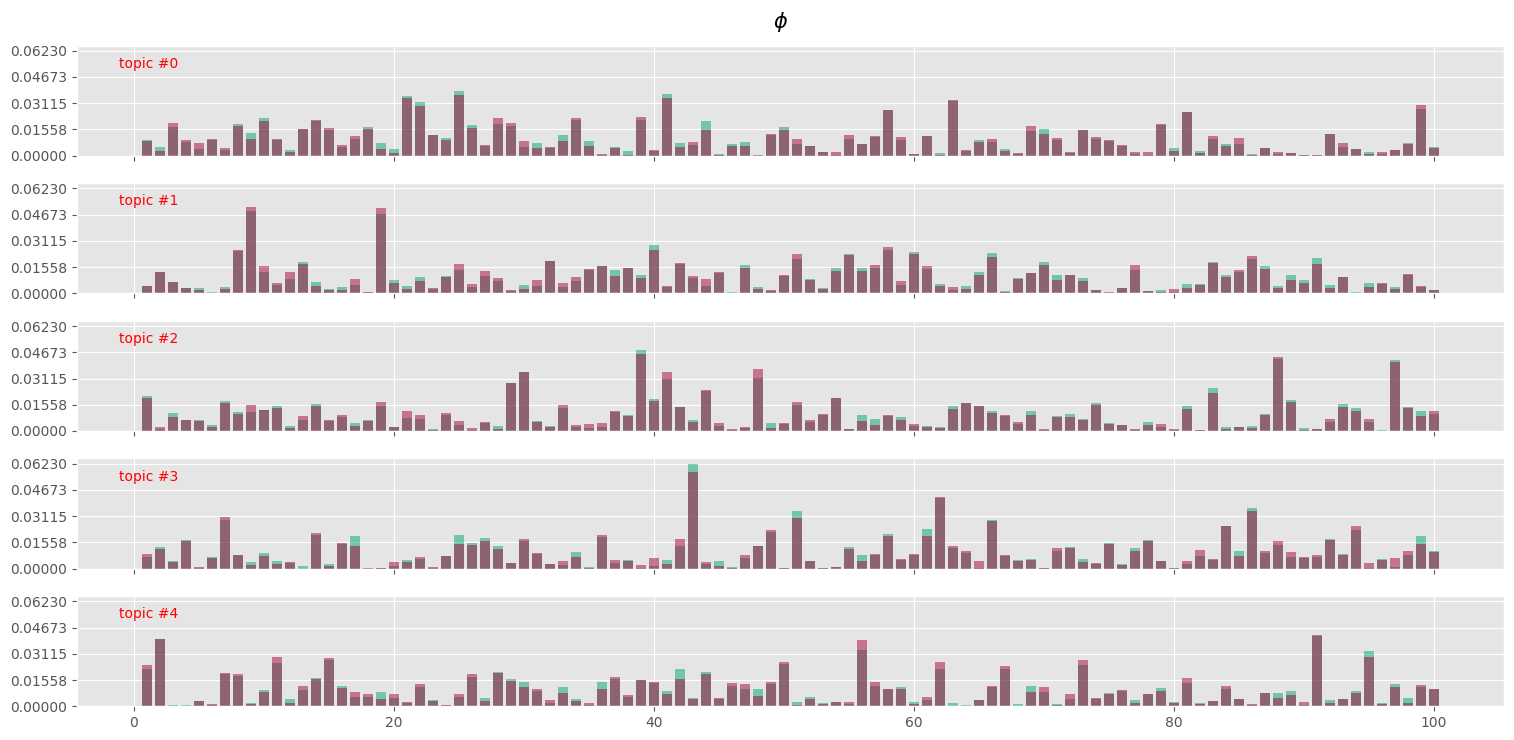

In [11]:
# 真の分布と推定分布の比較（語彙分布）
plot_phi(phi, true_phi, n_rows=5)

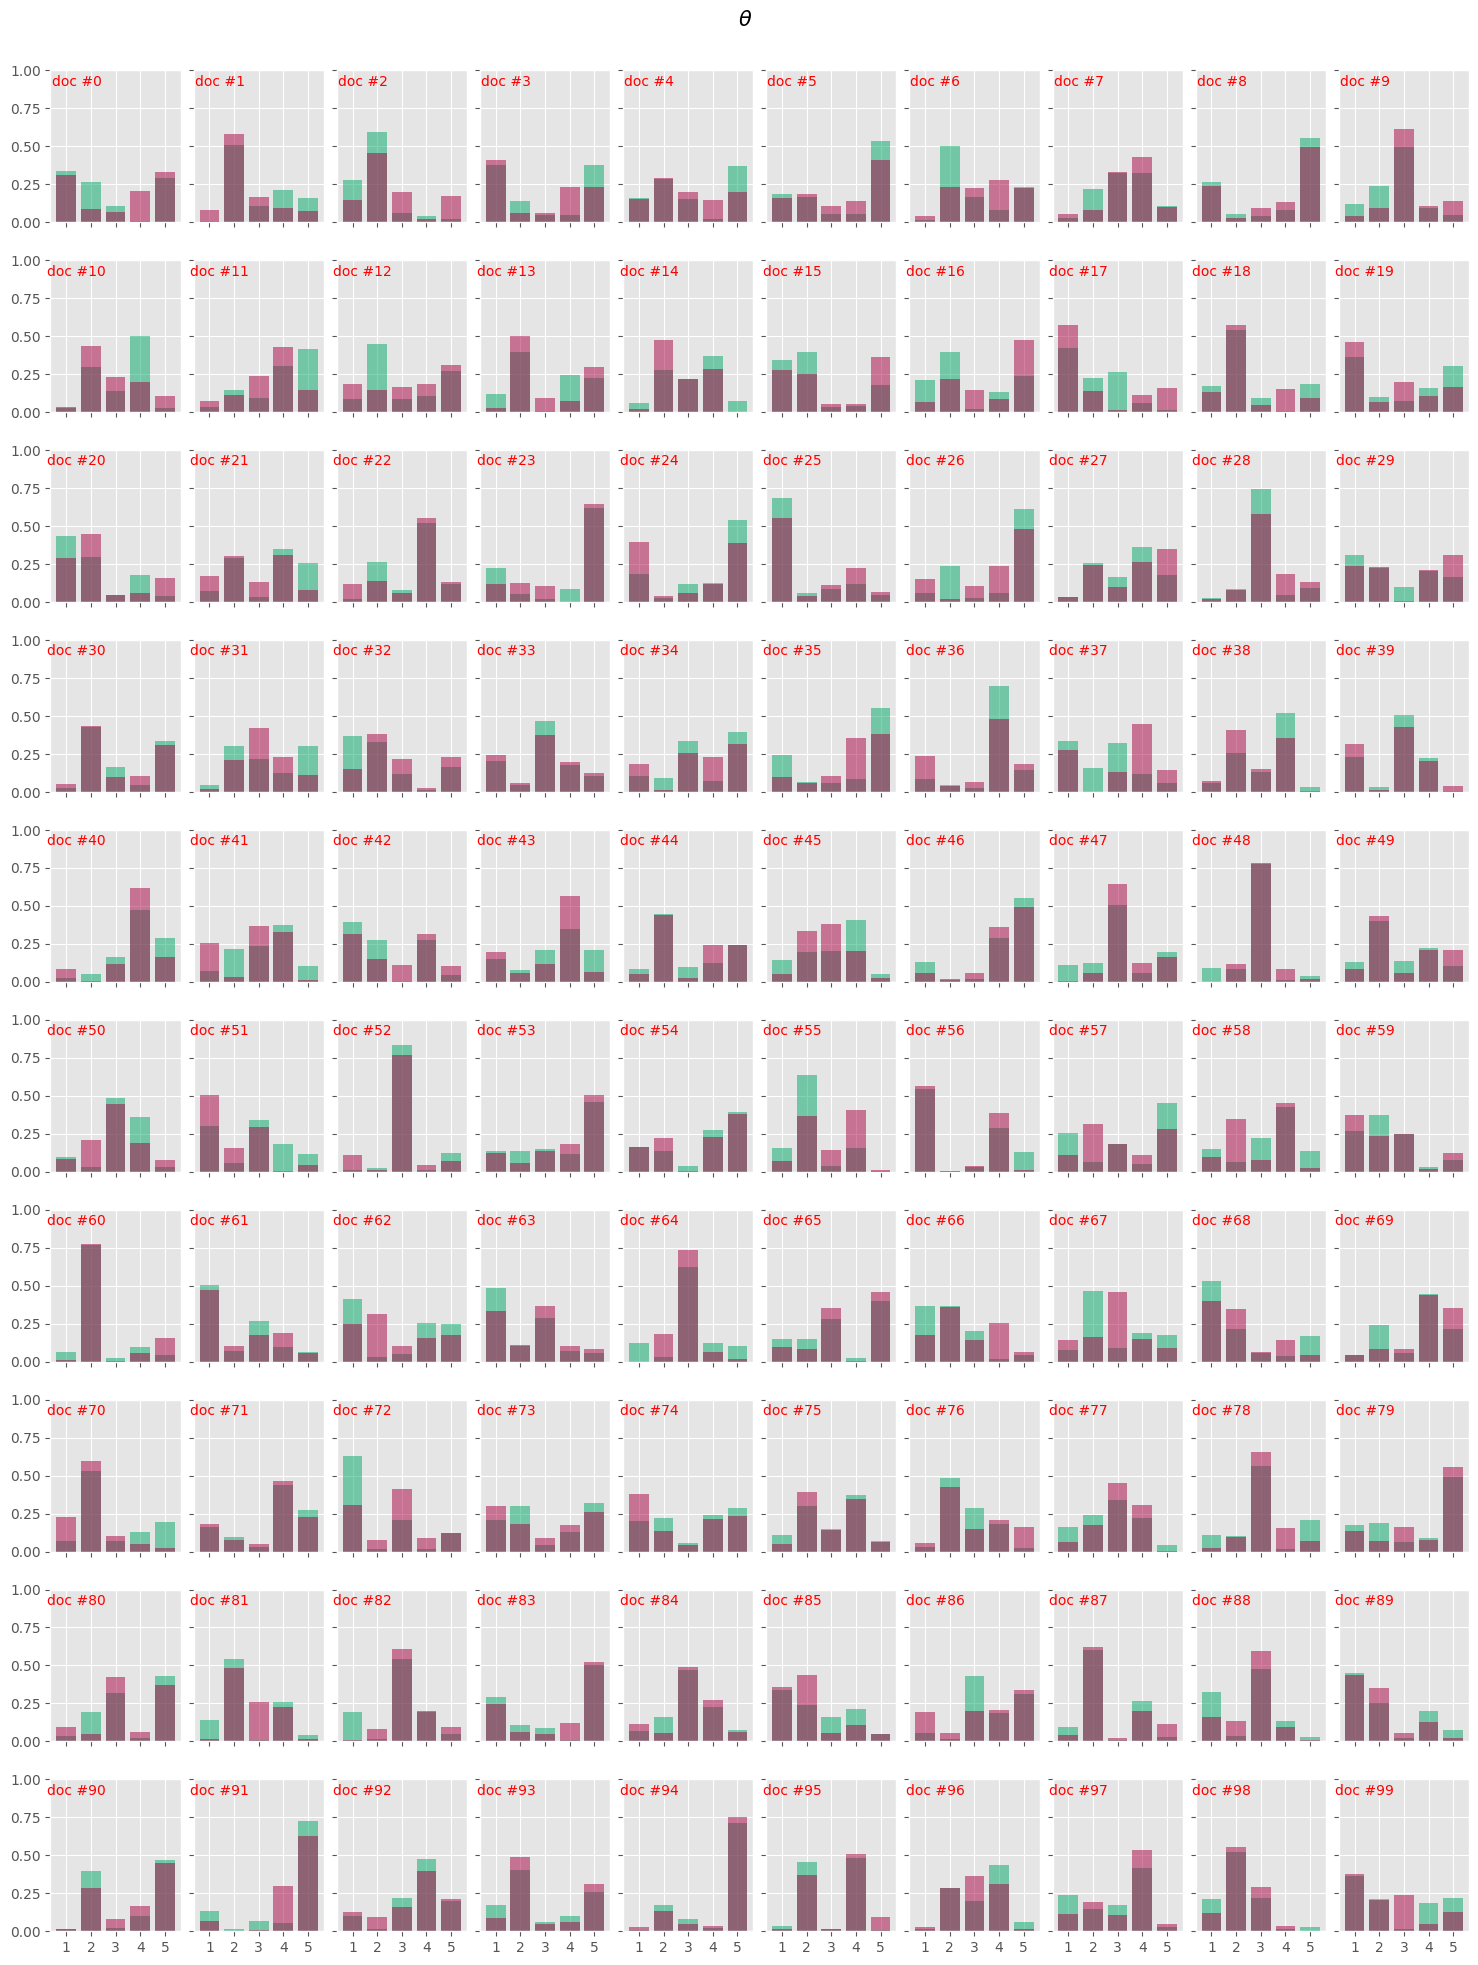

In [12]:
# 真の分布と推定分布の比較（トピック分布）
plot_theta(theta[:100], true_theta[:100], n_rows=10)